# Project: IMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The goal of the project is to analyze the popularity of movies based on a set of data. I used the Kaggle competition "Popular Movies of IMDb" (see https://www.kaggle.com/sankha1998/tmdb-top-10000-popular-movies-dataset) to retrieve necessary data. Mainly to answer the following two questions:

### Research Question 1: Which genres are most popular from year to year?
### Research Question 2:  What kinds of properties are associated with movies that have high revenues?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section I will load in the data, check for cleanliness, and then trim and clean dataset for analysis.

### General Properties

In [2]:
#load dataset

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

 I'm going to drop some attrtibute as they seem redundant or of no value for the analysis.
 Attributes such as, id, imdb_id, cast, homepage, director, tagline, keywords, overview, production_companies  , release_date 

### Data Cleaning (Extracting relevant data)

In [5]:
# Drop irrelevant columns
columns_to_drop = ['id', 'imdb_id', 'cast', 'homepage', 'director',
                   'tagline', 'keywords', 'overview', 'production_companies',
                   'release_date', 'budget_adj', 'revenue_adj']

df.drop(columns_to_drop, inplace=True, axis=1)


In [6]:
# renaming column 'original_title' to 'title'
df.rename(columns={'original_title': 'title'}, inplace=True)

In [7]:
df.columns

Index(['popularity', 'budget', 'revenue', 'title', 'runtime', 'genres',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [8]:
df.shape

(10866, 9)

### Check for missing/NULL values

In [9]:
df.isna().sum()

popularity       0
budget           0
revenue          0
title            0
runtime          0
genres          23
vote_count       0
vote_average     0
release_year     0
dtype: int64

#### Only 'genres' column has NULL value. Let's filter them out.

In [10]:
df.dropna(subset=['genres'], how='any', inplace=True);

In [11]:
#let's check for missing values
df.isna().sum()

popularity      0
budget          0
revenue         0
title           0
runtime         0
genres          0
vote_count      0
vote_average    0
release_year    0
dtype: int64

In [12]:
df.head(5)

,popularity,budget,revenue,title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015


 As we can see that genres attribute have multiple values for a single entry. I'm going to spit this into mutiple rows.

In [13]:
#let's get all the genres in dataset
# replacing "|" with "," as str.cnontains won't detect "|" becasue its a key symbol used for OR.

df['genres'] = df['genres'].str.replace("|",",");

C:\Users\Azhar\miniconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [14]:
df.head()

,popularity,budget,revenue,title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,"Action,Adventure,Science Fiction,Thriller",5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,"Action,Adventure,Science Fiction,Thriller",6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,"Adventure,Science Fiction,Thriller",2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,"Action,Adventure,Science Fiction,Fantasy",5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,"Action,Crime,Thriller",2947,7.3,2015


### Let's seprate multiple genres to single genre.

 I'm going to split each row with multiple genre values into multiple rows having only one genre for each entry.

In [41]:
data_frames = []
idx = 1
for col in df.columns:
    if col != 'genres':
        df_name = f'temp_{idx}'
        df_name = pd.DataFrame(df.genres.str.split(',').tolist(), index=df[col]).stack()
        df_name = df_name.reset_index([0, col])
        df_name.columns = [col, 'genres']
        idx+=1
        
    data_frames.append(df_name)

In [42]:
new_df = pd.concat(data_frames, axis=1)
df_clean = new_df.T.drop_duplicates().T
df_clean.head()

,popularity,genres,budget,revenue,title,runtime,vote_count,vote_average,release_year
0,32.985763,Action,150000000,1513528810,Jurassic World,124,5562,6.5,2015
1,32.985763,Adventure,150000000,1513528810,Jurassic World,124,5562,6.5,2015
2,32.985763,Science Fiction,150000000,1513528810,Jurassic World,124,5562,6.5,2015
3,32.985763,Thriller,150000000,1513528810,Jurassic World,124,5562,6.5,2015
4,28.419936,Action,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015


In [43]:
df_clean.shape

(26960, 9)

<a id='eda'></a>
## Exploratory Data Analysis

Now that I've trimmed and cleaned the data, Let's move on to exploration.

### Research Question 1: Which genres are most popular from year to year?

In [44]:
# Let's look at the summary statistics
df_clean.describe()

,popularity,genres,budget,revenue,title,runtime,vote_count,vote_average,release_year
count,26960.00000,26960,26960,26960,26960,26960,26960,26960.0,26960
unique,10791.00000,20,557,4702,10548,246,1289,72.0,56
top,0.59643,Drama,0,0,Annie,90,10,6.1,2014
freq,10.00000,4761,13354,14291,11,1274,1120,1351.0,1470


In [45]:
df_clean.dtypes

popularity      object
genres          object
budget          object
revenue         object
title           object
runtime         object
vote_count      object
vote_average    object
release_year    object
dtype: object

Let's change data types of the following columns:
- popularity
- budget
- revenue
- vote_average
- vote_count

In [46]:
df_clean=df_clean.astype({'popularity': 'float',
                          'budget':'float',
                          'revenue':'float',
                          'vote_average':'float',
                          'vote_count':'float'})

In [47]:
df_clean.head()

,popularity,genres,budget,revenue,title,runtime,vote_count,vote_average,release_year
0,32.985763,Action,150000000.0,1.513529e+09,Jurassic World,124,5562.0,6.5,2015
1,32.985763,Adventure,150000000.0,1.513529e+09,Jurassic World,124,5562.0,6.5,2015
2,32.985763,Science Fiction,150000000.0,1.513529e+09,Jurassic World,124,5562.0,6.5,2015
3,32.985763,Thriller,150000000.0,1.513529e+09,Jurassic World,124,5562.0,6.5,2015
4,28.419936,Action,150000000.0,3.784364e+08,Mad Max: Fury Road,120,6185.0,7.1,2015


In [48]:
table= pd.pivot_table(df_clean, values=['popularity'] ,columns=['genres'], index=[ 'release_year'])
table.head()

popularity                                                      \
genres           Action Adventure Animation    Comedy     Crime Documentary   
release_year                                                                  
1960           0.590724  0.700981       NaN  0.396000  0.346479         NaN   
1961           0.365913  0.767323  2.631987  0.679838  0.806519         NaN   
1962           0.708945  0.942513       NaN  0.273183  0.472816         NaN   
1963           0.951729  0.728487  2.180410  0.444481  0.552367         NaN   
1964           0.813087  0.736431  0.445746  0.491229  0.261690         NaN   

                                                                          \
genres           Drama    Family   Fantasy   Foreign   History    Horror   
release_year                                                               
1960          0.566305  0.278064  0.428247  0.194948  0.412364  0.591450   
1961          0.432233  0.755722  0.154073  0.113651  0.334463  0.254578   
1962          0.392000  0.323463  0.235542  0.235542  0.600060  0.179368   
1963          0.322448  0.852632  0.214071  0.351647  0.481618  0.376901   
1964          0.364818  0.878298  0.599791  0.152209  0.316377  0.189650   

                                                                               \
genres           Music   Mystery   Romance Science Fiction TV Movie  Thriller   
release_year                                                                    
1960          0.423531       NaN  0.541227        0.327905      NaN  0.811910   
1961          0.564748  0.712793  0.426036        0.274103      NaN       NaN   
1962          0.323933  0.259220  0.365621        0.179212      NaN  0.760582   
1963               NaN  0.421033  0.399573        0.467835      NaN  0.719929   
1964          0.753799  0.308091  0.221586        0.226636      NaN  0.622580   

                                  
genres             War   Western  
release_year                      
1960          0.225863  0.567759  
1961          0.531184  0.210021  
1962          0.506162  0.414180  
1963          0.664326  0.246957  
1964          0.930959  0.127679

In [49]:
max_popularity = table.idxmax(axis=1)
print(max_popularity)

release_year
1960           (popularity, Thriller)
1961          (popularity, Animation)
1962          (popularity, Adventure)
1963          (popularity, Animation)
1964                (popularity, War)
1965              (popularity, Music)
1966          (popularity, Animation)
1967          (popularity, Animation)
1968            (popularity, Mystery)
1969              (popularity, Crime)
1970          (popularity, Animation)
1971             (popularity, Family)
1972              (popularity, Crime)
1973          (popularity, Animation)
1974            (popularity, Mystery)
1975          (popularity, Adventure)
1976              (popularity, Crime)
1977             (popularity, Action)
1978              (popularity, Music)
1979             (popularity, Action)
1980    (popularity, Science Fiction)
1981          (popularity, Adventure)
1982                (popularity, War)
1983          (popularity, Adventure)
1984             (popularity, Family)
1985             (popularity, Family)

### Research Question 2:  What kinds of properties are associated with movies that have high revenues?

Let's have a look at the correlation matrix

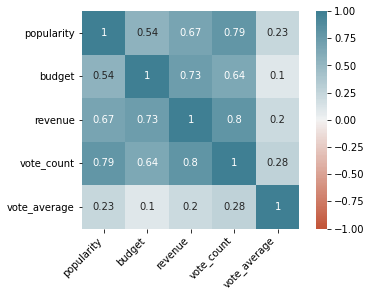

In [57]:
import seaborn as sns
corr =df_clean.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right');

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!